In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
Path = "./Resources/SpaceMission_Merged.csv"
space_missions = pd.read_csv(Path)
space_missions.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
0,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
2,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
3,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
4,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [3]:
#how many missions did each rocket fly?
total_rocket_missions = space_missions.groupby(["Rocket"])["Mission"].count()
total_rocket_missions_df = total_rocket_missions.to_frame()
total_rocket_missions_df

,Mission
Rocket,
ASLV,4
Angara 1.2,2
Angara A5/Briz-M,2
Angara A5/Persey,1
Antares 110,2
...,...
Zenit-3 SLB,6
Zenit-3 SLBF,4
Zhongke-1A,1


In [4]:
#sort so the rockets with the most missions are on top, rename column for clarity
total_rocket_missions_df = total_rocket_missions_df.sort_values(by="Mission",ascending=False)
total_rocket_missions_df.rename(columns = {"Mission": "Total Missions"}, inplace=True)
total_rocket_missions_df = total_rocket_missions_df.reset_index()
total_rocket_missions_df

,Rocket,Total Missions
0,Cosmos-3M (11K65M),446
1,Voskhod,299
2,Molniya-M /Block ML,128
3,Cosmos-2I (63SM),126
4,Soyuz U,125
...,...,...
365,Energiya/Polyus,1
366,Energiya/Buran,1
367,Conestoga-1620,1
368,Delta 3920-8,1


In [5]:
#What is the number of successes, failures, and partial failures for each rocket?
mission_status = space_missions.groupby(["Rocket"])["MissionStatus"].value_counts()
mission_status_df = mission_status.to_frame()
mission_status_df = mission_status_df.reset_index()
mission_status_df

,Rocket,MissionStatus,count
0,ASLV,Failure,2
1,ASLV,Success,1
2,ASLV,Partial Failure,1
3,Angara 1.2,Success,2
4,Angara A5/Briz-M,Success,2
...,...,...,...
557,Zenit-3 SLB,Partial Failure,1
558,Zenit-3 SLBF,Success,4
559,Zhongke-1A,Success,1
560,ZhuQue-1,Failure,1


In [6]:
#count of successes only
rocket_successes_df = mission_status_df.loc[mission_status_df["MissionStatus"]=="Success"]
rocket_successes_df = rocket_successes_df.rename(columns = {"count":"Successes"})
rocket_successes_df = rocket_successes_df[["Rocket","Successes"]]
rocket_successes_df

,Rocket,Successes
1,ASLV,1
3,Angara 1.2,2
4,Angara A5/Briz-M,2
6,Antares 110,2
7,Antares 120,2
...,...,...
554,Zenit-3 SL,33
556,Zenit-3 SLB,5
558,Zenit-3 SLBF,4
559,Zhongke-1A,1


In [7]:
#count of failures only (partial failures are counted as failures here)
rocket_failures_df = mission_status_df.loc[(mission_status_df["MissionStatus"]=="Failure") | 
                                          (mission_status_df["MissionStatus"]=="Partial Failure")]
rocket_failures = rocket_failures_df.groupby(["Rocket"])["count"].sum()
rocket_failures_df = rocket_failures.to_frame()
rocket_failures_df = rocket_failures_df.reset_index()
rocket_failures_df = rocket_failures_df.rename(columns = {"count":"Failures"})
rocket_failures_df = rocket_failures_df[["Rocket","Failures"]]
rocket_failures_df

,Rocket,Failures
0,ASLV,3
1,Angara A5/Persey,1
2,Antares 130,1
3,Ariane 1,2
4,Ariane 2,1
...,...,...
176,Vostok-2M,4
177,Zenit-2,8
178,Zenit-3 SL,3
179,Zenit-3 SLB,1


In [8]:
#merge the successes and failures count for each rocket into one dataframe
rocket_mission_status = pd.merge(rocket_successes_df, rocket_failures_df, how = "outer", on=["Rocket"])
rocket_mission_status = rocket_mission_status.fillna(0)
rocket_mission_status["Successes"] = rocket_mission_status["Successes"].astype(int)
rocket_mission_status["Failures"] = rocket_mission_status["Failures"].astype(int)
rocket_mission_status

,Rocket,Successes,Failures
0,ASLV,1,3
1,Angara 1.2,2,0
2,Angara A5/Briz-M,2,0
3,Antares 110,2,0
4,Antares 120,2,0
...,...,...,...
365,Thor-DM 18 Able I,0,3
366,Unha-2,0,1
367,VLS-1,0,2
368,Volna,0,1


In [9]:
#merge the successes and failures with the rocket missions count
rocket_missions = pd.merge(total_rocket_missions_df, rocket_mission_status, how = "outer", on = ["Rocket"])
rocket_missions

,Rocket,Total Missions,Successes,Failures
0,Cosmos-3M (11K65M),446,419,27
1,Voskhod,299,283,16
2,Molniya-M /Block ML,128,122,6
3,Cosmos-2I (63SM),126,118,8
4,Soyuz U,125,118,7
...,...,...,...,...
365,Energiya/Polyus,1,1,0
366,Energiya/Buran,1,1,0
367,Conestoga-1620,1,0,1
368,Delta 3920-8,1,1,0


In [10]:
#calculate the sucess rate for each rocket and add it in a new column
rocket_missions["Success Rate"] = 0.0
for row in rocket_missions:
    rocket_missions["Success Rate"] = rocket_missions["Successes"]/rocket_missions["Total Missions"]*100
rocket_missions

,Rocket,Total Missions,Successes,Failures,Success Rate
0,Cosmos-3M (11K65M),446,419,27,93.946188
1,Voskhod,299,283,16,94.648829
2,Molniya-M /Block ML,128,122,6,95.312500
3,Cosmos-2I (63SM),126,118,8,93.650794
4,Soyuz U,125,118,7,94.400000
...,...,...,...,...,...
365,Energiya/Polyus,1,1,0,100.000000
366,Energiya/Buran,1,1,0,100.000000
367,Conestoga-1620,1,0,1,0.000000
368,Delta 3920-8,1,1,0,100.000000


In [11]:
#reduce the data frame to the 25 rockets that flew the most total missions
top_25 = rocket_missions.head(25)
top_25 = top_25.reset_index(drop=True)
top_25

,Rocket,Total Missions,Successes,Failures,Success Rate
0,Cosmos-3M (11K65M),446,419,27,93.946188
1,Voskhod,299,283,16,94.648829
2,Molniya-M /Block ML,128,122,6,95.312500
3,Cosmos-2I (63SM),126,118,8,93.650794
4,Soyuz U,125,118,7,94.400000
5,Tsyklon-3,122,114,8,93.442623
6,Falcon 9 Block 5,111,111,0,100.000000
7,Tsyklon-2,106,105,1,99.056604
8,Vostok-2M,93,89,4,95.698925
9,Molniya-M /Block 2BL,87,84,3,96.551724


In [12]:
#pulls data out of the original table for each rocket
companies = []
countries = []
territories = []
first_launch_date = []
i=0
for row in top_25["Rocket"]:
    rocket = top_25.iloc[i,0]
    rocket_data = space_missions.loc[space_missions["Rocket"]==rocket]
    company = rocket_data.iloc[0,0]
    companies.append(company)
    country = rocket_data.iloc[0,11]
    countries.append(country)
    territory = rocket_data.iloc[0,10]
    territories.append(territory)
    date = rocket_data.iloc[0,1]
    first_launch_date.append(date)
    i += 1

In [13]:
#adds the data to our dataframe
top_25["Company"] = companies
top_25["Country"] = countries
top_25["Territory"] = territories
top_25["First Launch Date"] = first_launch_date
top_25

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date
0,Cosmos-3M (11K65M),446,419,27,93.946188,RVSN USSR,Russia,NaN,1967-05-15
1,Voskhod,299,283,16,94.648829,RVSN USSR,Kazakhstan,NaN,1963-11-16
2,Molniya-M /Block ML,128,122,6,95.312500,RVSN USSR,Russia,NaN,1974-04-20
3,Cosmos-2I (63SM),126,118,8,93.650794,RVSN USSR,Russia,NaN,1965-10-19
4,Soyuz U,125,118,7,94.400000,RVSN USSR,Russia,NaN,1973-05-18
5,Tsyklon-3,122,114,8,93.442623,RVSN USSR,Russia,NaN,1977-06-24
6,Falcon 9 Block 5,111,111,0,100.000000,SpaceX,USA,Florida,2018-05-11
7,Tsyklon-2,106,105,1,99.056604,RVSN USSR,Kazakhstan,NaN,1969-08-06
8,Vostok-2M,93,89,4,95.698925,RVSN USSR,Kazakhstan,NaN,1964-08-28
9,Molniya-M /Block 2BL,87,84,3,96.551724,RVSN USSR,Russia,NaN,1972-09-19


In [14]:
#reversing the order of the original table by date in order to get the most recent launch dates 
#and current status (retired vs active)
space_missions_reversed = space_missions.sort_values(by="Date", ascending = False)
space_missions_reversed = space_missions_reversed.reset_index(drop=True)
space_missions_reversed

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
0,CASC,2022-07-29,13:28:00,Long March 2D,Yaogan 35 Group 03,Active,Success,Day,LC-3,Xichang Satellite Launch Center,NaN,China
1,CAS Space,2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,Success,Night,,Jiuquan Satellite Launch Center,NaN,China
2,CASC,2022-07-24,06:22:00,Long March 5B,Wentian,Active,Success,Day,LC-101,Wenchang Satellite Launch Center,NaN,China
3,SpaceX,2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,Success,Day,LC-39A,Kennedy Space Center,Florida,USA
4,SpaceX,2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,Success,Day,SLC-4E,Vandenberg SFB,California,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
4625,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
4626,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
4627,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
4628,RVSN USSR,1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,Success,Night,Site 1/5,Baikonur Cosmodrome,NaN,Kazakhstan


In [15]:
#retrieves the most recent rocket status for each rocket
active = []
i=0
for row in top_25["Rocket"]:
    rocket = top_25.iloc[i,0]
    rocket_data = space_missions_reversed.loc[space_missions["Rocket"]==rocket]
    status = rocket_data.iloc[0,5]
    active.append(status)
    i += 1

In [16]:
#adds the information to our rocket data frame
top_25["Status"] = active
top_25

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date,Status
0,Cosmos-3M (11K65M),446,419,27,93.946188,RVSN USSR,Russia,NaN,1967-05-15,Retired
1,Voskhod,299,283,16,94.648829,RVSN USSR,Kazakhstan,NaN,1963-11-16,Retired
2,Molniya-M /Block ML,128,122,6,95.312500,RVSN USSR,Russia,NaN,1974-04-20,Retired
3,Cosmos-2I (63SM),126,118,8,93.650794,RVSN USSR,Russia,NaN,1965-10-19,Retired
4,Soyuz U,125,118,7,94.400000,RVSN USSR,Russia,NaN,1973-05-18,Retired
5,Tsyklon-3,122,114,8,93.442623,RVSN USSR,Russia,NaN,1977-06-24,Retired
6,Falcon 9 Block 5,111,111,0,100.000000,SpaceX,USA,Florida,2018-05-11,Retired
7,Tsyklon-2,106,105,1,99.056604,RVSN USSR,Kazakhstan,NaN,1969-08-06,Retired
8,Vostok-2M,93,89,4,95.698925,RVSN USSR,Kazakhstan,NaN,1964-08-28,Retired
9,Molniya-M /Block 2BL,87,84,3,96.551724,RVSN USSR,Russia,NaN,1972-09-19,Retired


In [17]:
#sorts our top 25 by which rocket has the earliest first launch date
rocket_by_launch_date = top_25.sort_values(by="First Launch Date")
rocket_by_launch_date = rocket_by_launch_date.reset_index(drop=True)
rocket_by_launch_date

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date,Status
0,Molniya,40,22,18,55.000000,RVSN USSR,Kazakhstan,NaN,1960-10-10,Retired
1,Thor DM-21 Agena-B,38,29,9,76.315789,US Air Force,USA,California,1960-10-26,Active
2,Cosmos-2I (63S1),38,26,12,68.421053,RVSN USSR,Russia,NaN,1961-10-27,Active
3,Vostok-2,45,38,7,84.444444,RVSN USSR,Kazakhstan,NaN,1962-06-01,Retired
4,Voskhod,299,283,16,94.648829,RVSN USSR,Kazakhstan,NaN,1963-11-16,Retired
5,Atlas-SLV3 Agena-D,47,41,6,87.234043,General Dynamics,USA,California,1964-08-14,Active
6,Vostok-2M,93,89,4,95.698925,RVSN USSR,Kazakhstan,NaN,1964-08-28,Retired
7,Molniya-M /Block L,44,41,3,93.181818,RVSN USSR,Kazakhstan,NaN,1965-10-04,Retired
8,Cosmos-2I (63SM),126,118,8,93.650794,RVSN USSR,Russia,NaN,1965-10-19,Retired
9,Cosmos-3M (11K65M),446,419,27,93.946188,RVSN USSR,Russia,NaN,1967-05-15,Retired


In [18]:
#which of our top 25 rockets is still active?
rocket_by_launch_date_active = rocket_by_launch_date.loc[rocket_by_launch_date["Status"]=="Active"]
rocket_by_launch_date_active

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date,Status
1,Thor DM-21 Agena-B,38,29,9,76.315789,US Air Force,USA,California,1960-10-26,Active
2,Cosmos-2I (63S1),38,26,12,68.421053,RVSN USSR,Russia,NaN,1961-10-27,Active
5,Atlas-SLV3 Agena-D,47,41,6,87.234043,General Dynamics,USA,California,1964-08-14,Active
16,Space Shuttle Discovery,39,39,0,100.000000,NASA,USA,Florida,1984-08-30,Active
19,Delta II 7925,62,60,2,96.774194,Boeing,USA,Florida,1990-11-26,Active
21,Atlas V 401,39,38,1,97.435897,ILS,USA,Florida,2002-08-21,Active


In [19]:
first_launch_date_all = []
i=0
for row in rocket_missions["Rocket"]:
    rocket = rocket_missions.iloc[i,0]
    rocket_data = space_missions.loc[space_missions["Rocket"]==rocket]
    date = rocket_data.iloc[0,1]
    first_launch_date_all.append(date)
    i += 1

In [20]:
#grabs the first launch date for all rockets
rocket_missions["First Launch Date"] = first_launch_date_all
rocket_missions.head()

,Rocket,Total Missions,Successes,Failures,Success Rate,First Launch Date
0,Cosmos-3M (11K65M),446,419,27,93.946188,1967-05-15
1,Voskhod,299,283,16,94.648829,1963-11-16
2,Molniya-M /Block ML,128,122,6,95.312500,1974-04-20
3,Cosmos-2I (63SM),126,118,8,93.650794,1965-10-19
4,Soyuz U,125,118,7,94.400000,1973-05-18


In [21]:
#extracts the year so that we can see which year each rocket was first launched
launch_year = []
for row in rocket_missions["First Launch Date"]:
    year = row[:4]
    launch_year.append(year)
rocket_missions["Launch Year"] = launch_year
rocket_missions.head()

,Rocket,Total Missions,Successes,Failures,Success Rate,First Launch Date,Launch Year
0,Cosmos-3M (11K65M),446,419,27,93.946188,1967-05-15,1967
1,Voskhod,299,283,16,94.648829,1963-11-16,1963
2,Molniya-M /Block ML,128,122,6,95.312500,1974-04-20,1974
3,Cosmos-2I (63SM),126,118,8,93.650794,1965-10-19,1965
4,Soyuz U,125,118,7,94.400000,1973-05-18,1973


In [22]:
#groups rockets into years based on their first launch date, then analyzes how many total missions
#rockets first launched in a given year were used for
rocket_usage_over_time = rocket_missions.groupby("Launch Year")["Total Missions"].sum()
rocket_usage_over_time_df = rocket_usage_over_time.to_frame()
rocket_usage_over_time_df = rocket_usage_over_time_df.reset_index()
rocket_usage_over_time_df

,Launch Year,Total Missions
0,1957,13
1,1958,45
2,1959,32
3,1960,116
4,1961,67
...,...,...
61,2018,156
62,2019,22
63,2020,36
64,2021,15


In [23]:
rocket_usage_over_time_df["Launch Year"] = rocket_usage_over_time_df["Launch Year"].astype(int)

# Rocket Usage Fun Facts

## Which rocket was used for the most missions?

<Axes: title={'center': 'Total Missions Per Rocket'}, xlabel='Rocket', ylabel='Number of Missions'>

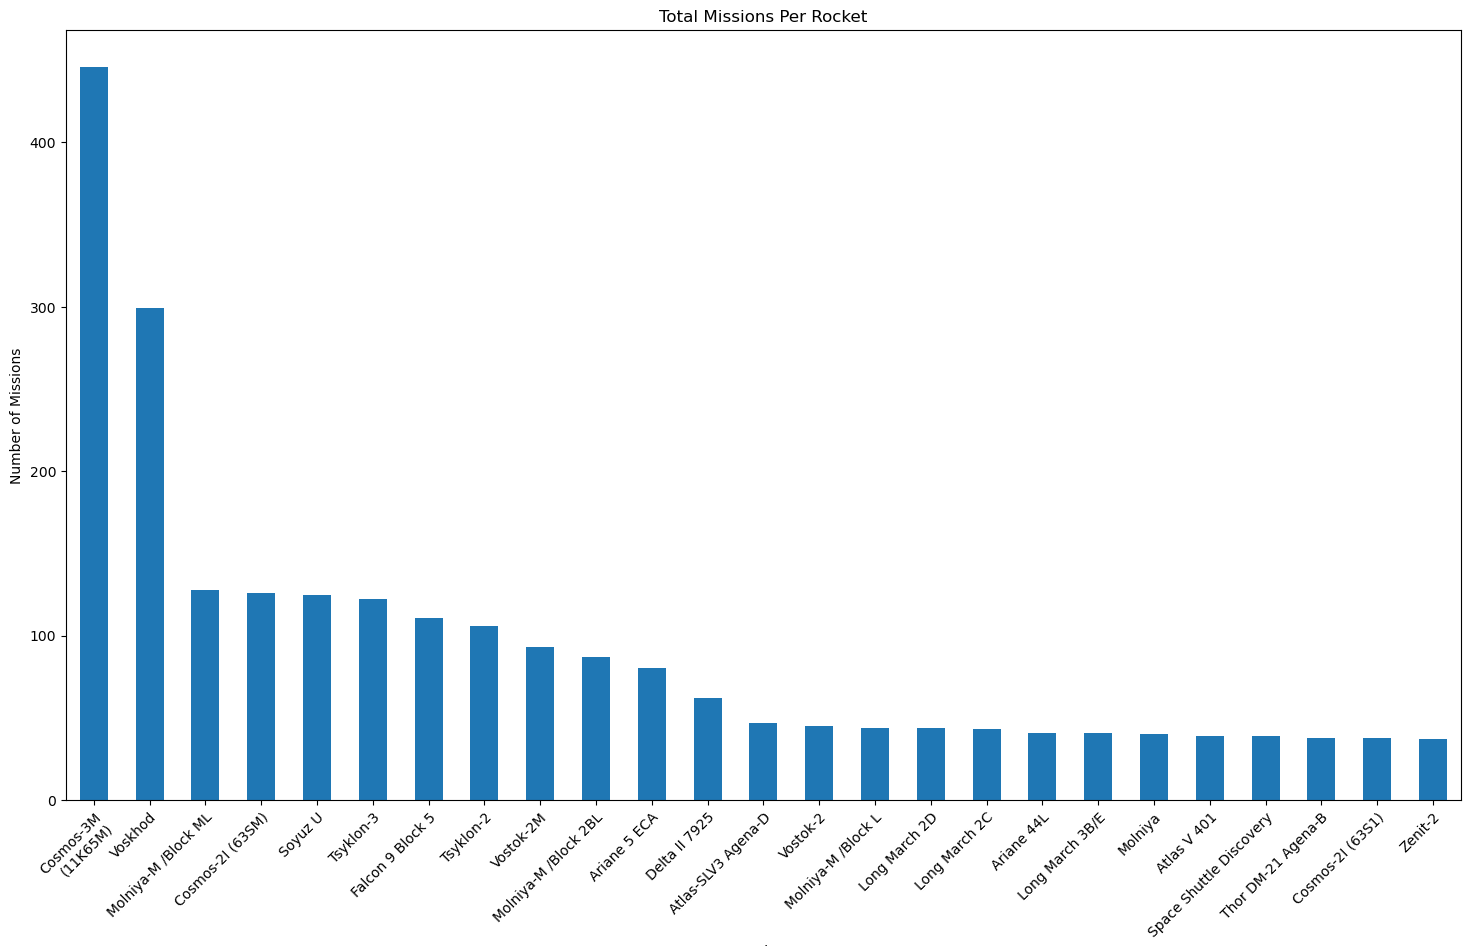

In [27]:
figure1 = top_25["Total Missions"].plot(kind="bar",
                                        figsize=(18,10),
                                        title="Total Missions Per Rocket", 
                                        xlabel="Rocket",
                                        ylabel="Number of Missions",
                              
)
figure1.set_xticklabels(top_25["Rocket"], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
figure1

In [28]:
fig = figure1.get_figure()
fig.savefig('Rocket-Usage-Output/Most-Missions.png')

In [29]:
total_missions_winner = top_25.loc[top_25["Rocket"]=="Cosmos-3M (11K65M)"]
total_missions_winner

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date,Status
0,Cosmos-3M (11K65M),446,419,27,93.946188,RVSN USSR,Russia,NaN,1967-05-15,Retired


## Which rocket had the highest success rate?

<Axes: title={'center': 'Overall Success Rate'}, xlabel='Rocket', ylabel='Success Rate'>

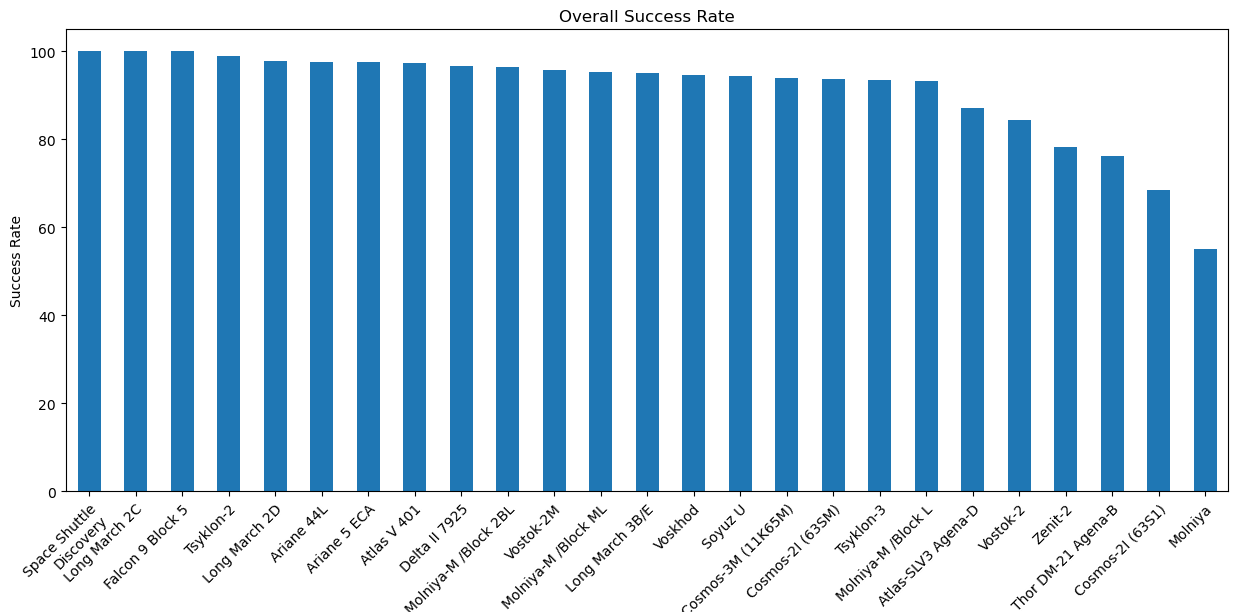

In [30]:
top_25_by_success_rate = top_25.sort_values("Success Rate", ascending=False)
figure2 = top_25_by_success_rate["Success Rate"].plot(kind="bar",
                                                      figsize=(15,6),
                                                    title="Overall Success Rate", 
                                                    xlabel="Rocket",
                                                    ylabel="Success Rate",
                                                      )
figure2.set_xticklabels(top_25_by_success_rate["Rocket"], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
figure2

In [31]:
fig = figure2.get_figure()
fig.savefig('Rocket-Usage-Output/Success-Rate.png')

In [32]:
success_rate_winner = top_25.loc[top_25["Success Rate"]==100]
success_rate_winner

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date,Status
6,Falcon 9 Block 5,111,111,0,100.0,SpaceX,USA,Florida,2018-05-11,Retired
16,Long March 2C,43,43,0,100.0,CASC,China,NaN,1982-09-09,Retired
21,Space Shuttle Discovery,39,39,0,100.0,NASA,USA,Florida,1984-08-30,Active


## Which rocket, out of the top 25 rockets with the most missions, failed the most?

<Axes: title={'center': 'Most Failures'}, xlabel='Rocket', ylabel='Number of Failures'>

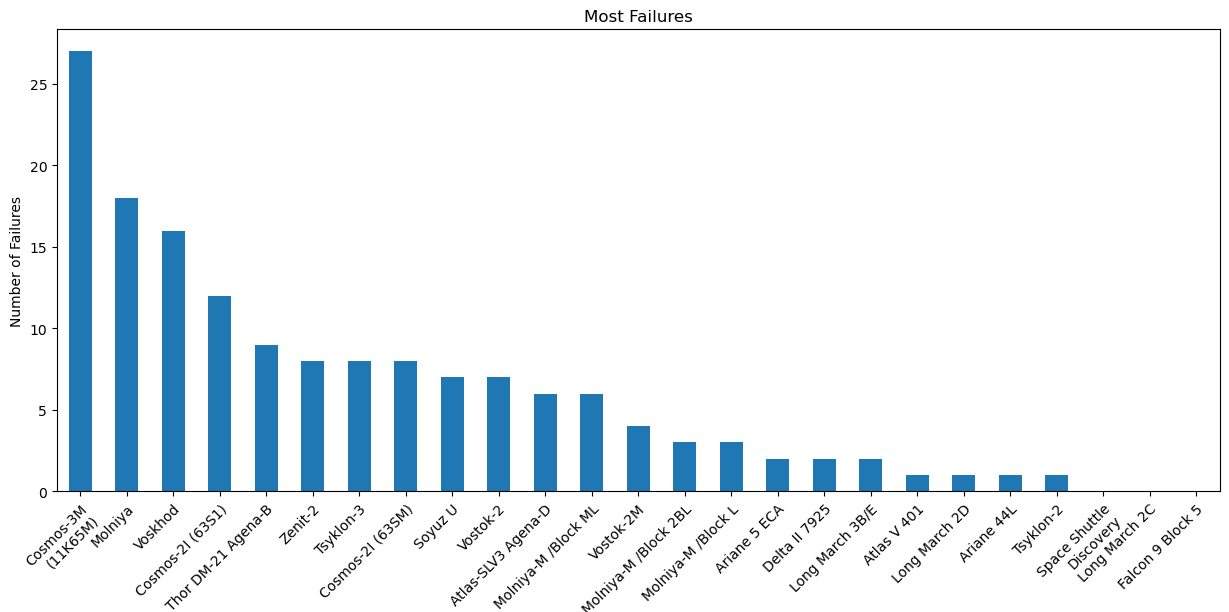

In [33]:
top_25_by_failures = top_25.sort_values("Failures", ascending = False)
figure3 = top_25_by_failures["Failures"].plot(kind="bar",
                                                      figsize=(15,6),
                                                    title="Most Failures", 
                                                    xlabel="Rocket",
                                                    ylabel="Number of Failures",
                                                      )
figure3.set_xticklabels(top_25_by_failures["Rocket"], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
figure3

In [34]:
fig = figure3.get_figure()
fig.savefig('Rocket-Usage-Output/Fail.png')

In [35]:
so_much_fail = top_25.loc[top_25["Rocket"]=="Cosmos-3M (11K65M)"]
so_much_fail

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date,Status
0,Cosmos-3M (11K65M),446,419,27,93.946188,RVSN USSR,Russia,NaN,1967-05-15,Retired


## Which of the top 25 rockets was launched first?

In [36]:
first_rocket = rocket_by_launch_date.loc[rocket_by_launch_date["Rocket"]=="Molniya"]
first_rocket

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date,Status
0,Molniya,40,22,18,55.0,RVSN USSR,Kazakhstan,NaN,1960-10-10,Retired


## What is the oldest rocket that is still being used?

In [37]:
oldest_active = rocket_by_launch_date_active.loc[rocket_by_launch_date_active["Rocket"]=="Thor DM-21 Agena-B"]
oldest_active

,Rocket,Total Missions,Successes,Failures,Success Rate,Company,Country,Territory,First Launch Date,Status
1,Thor DM-21 Agena-B,38,29,9,76.315789,US Air Force,USA,California,1960-10-26,Active


## Are there any trends in the number of times a rocket was used more than once from 1950s to the present?  (ie, are newer rockets being used more times than older rockets were?)

<Axes: title={'center': 'Rocket Usage Over Time'}, xlabel='Manufacture Year', ylabel='Number of Total Missions'>

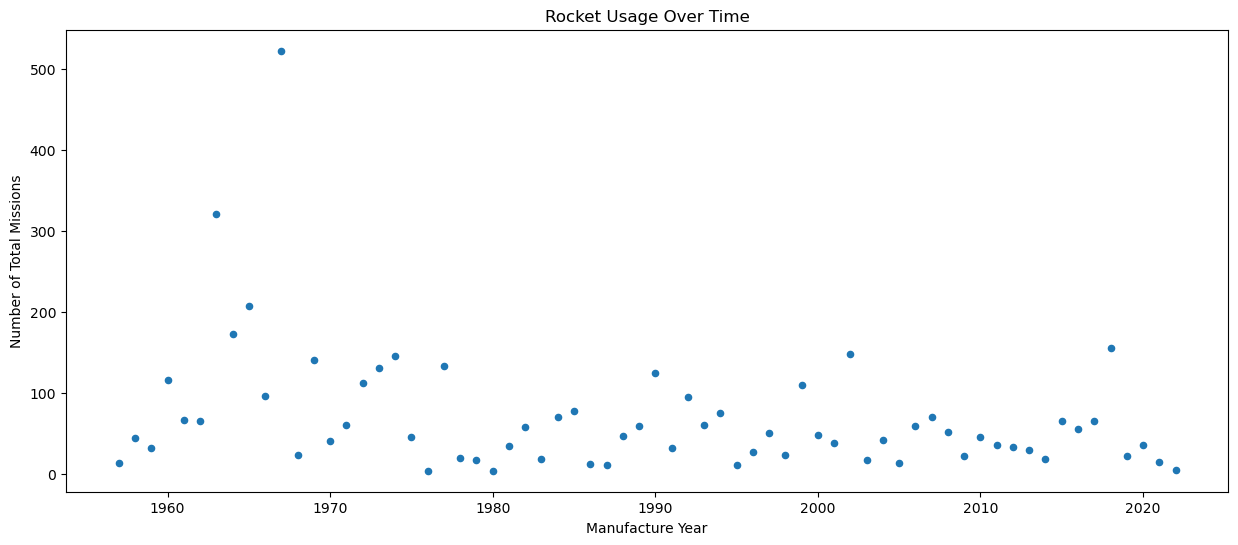

In [38]:
figure4 = rocket_usage_over_time_df.plot.scatter(x = ["Launch Year"],
                                                 y = ["Total Missions"],
                                                figsize=(15,6),
                                                title="Rocket Usage Over Time", 
                                                xlabel="Manufacture Year",
                                                ylabel="Number of Total Missions")
figure4

In [39]:
fig = figure4.get_figure()
fig.savefig('Rocket-Usage-Output/Usage-Over-Time.png')

In [40]:
x = rocket_usage_over_time_df["Launch Year"]
y = rocket_usage_over_time_df["Total Missions"]
print(f"The correlation coefficient is {round(st.pearsonr(x, y)[0],2)}")

The correlation coefficient is -0.33
